# 01 KMEANS IRIS DATASET

In [1]:
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#import pandas_profiling
#import datetime
from sklearn.cluster import KMeans, AgglomerativeClustering
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


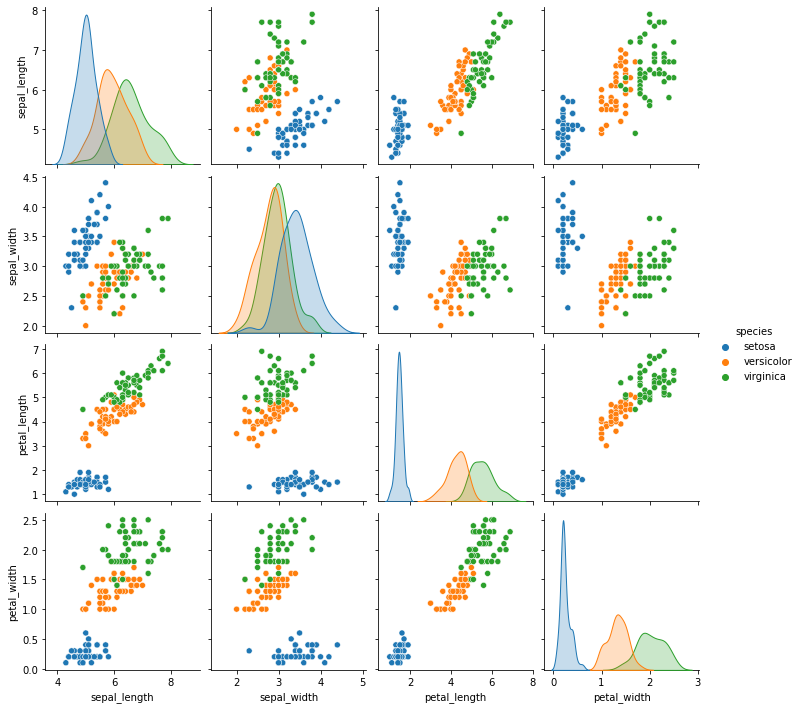

In [6]:
sns.pairplot(df, hue="species")
plt.show()

In [7]:
X=df.drop("species", axis=1)
X.shape

(150, 4)

In [8]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## HOPKINS TEST

In [10]:
# pip install pyclustertend
from pyclustertend import hopkins

In [11]:
X.shape

(150, 4)

In [12]:
hopkins(X, X.shape[0])

0.17064206744494967

## ELBOW METHOD

In [14]:
ssd = [] # Sum of Squared Distances
K = range(1,10) # different k Values

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

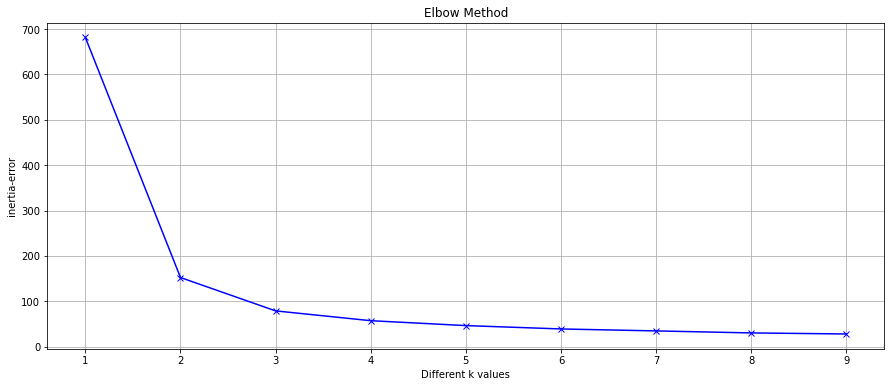

In [15]:
plt.figure(figsize=(15,6))
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

In [16]:
model=KMeans(n_clusters = 3)
model.fit(X)
model

KMeans(n_clusters=3)

In [17]:
model.inertia_

78.851441426146

In [18]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [19]:
df['predicted_clusters']=model.labels_

In [20]:
ct = pd.crosstab(df.species,df['predicted_clusters'])
ct

predicted_clusters,0,1,2
species,,,
setosa,0,0,50
versicolor,2,48,0
virginica,36,14,0


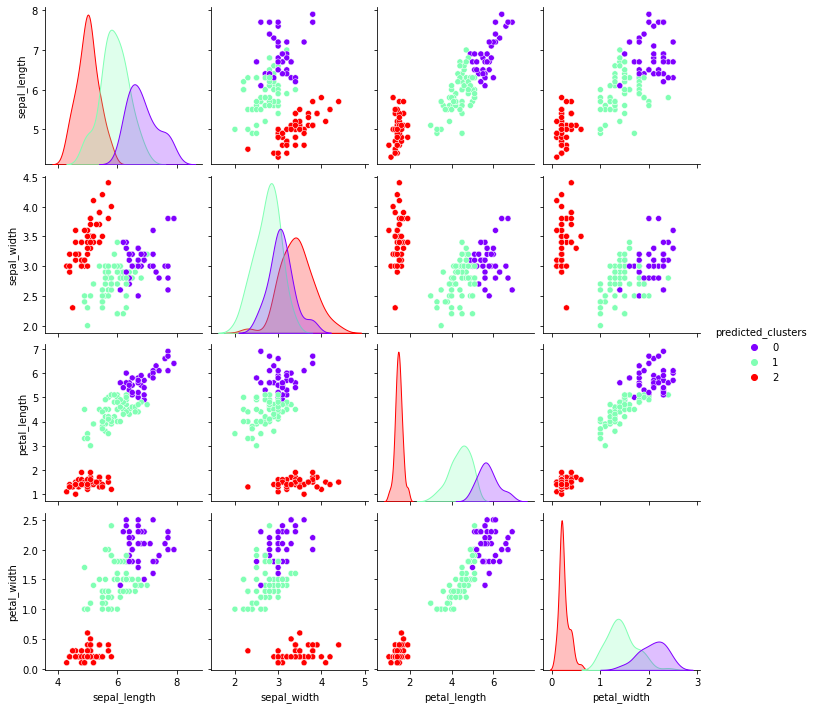

In [21]:
sns.pairplot(df, hue="predicted_clusters",palette='rainbow')
plt.show();

In [22]:
centers=model.cluster_centers_

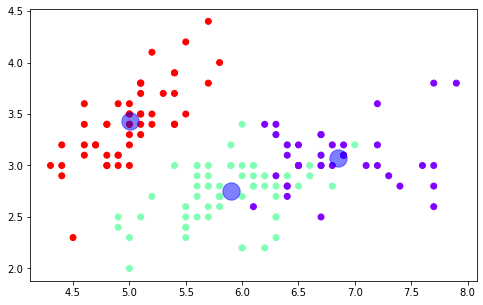

In [23]:
plt.figure(figsize = (8,5))
plt.scatter(df.iloc[:,0], df.iloc[:,1],c=df['predicted_clusters'], cmap="rainbow")
plt.scatter(centers[:,0], centers[:,1], c="blue", s=300, alpha=0.5);

## HIERARCHY CLUSTERING

In [ ]:
# from scipy.cluster.hierarchy import linkage, dendrogram
# from sklearn.cluster import AgglomerativeClustering

In [24]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
hc_complete =  linkage(X,"complete")
hc_ward = linkage(X, "ward")
hc_single = linkage(X, "single")

### #COMPLETE

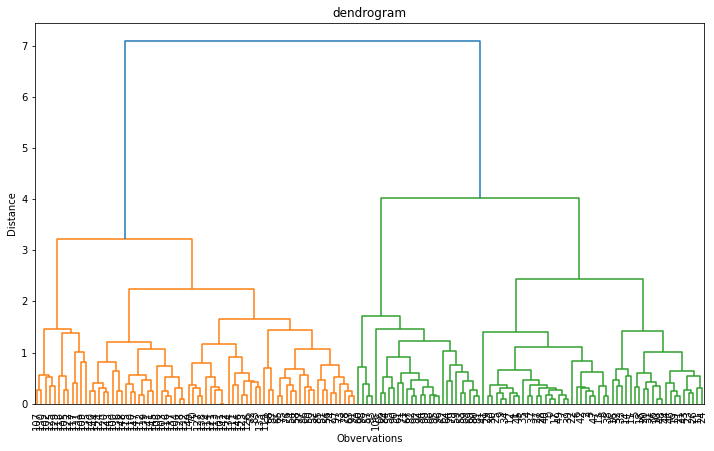

In [26]:
plt.figure(figsize = (12,7))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

### #WARD

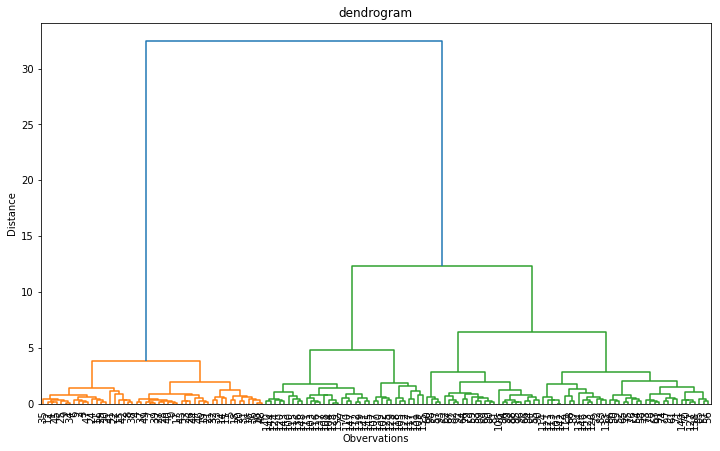

In [27]:
plt.figure(figsize = (12,7))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

### #SINGLE

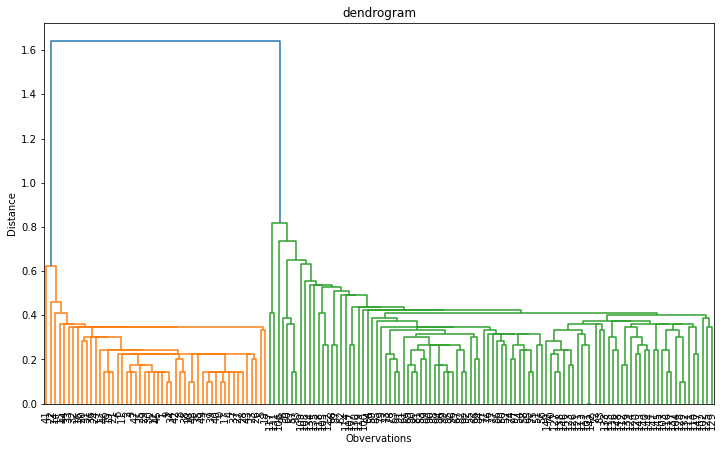

In [28]:
plt.figure(figsize = (12,7))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

In [29]:
hc = AgglomerativeClustering(n_clusters = 3,affinity='euclidean',linkage='ward') # burada default linkage='ward' dur.
hc.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

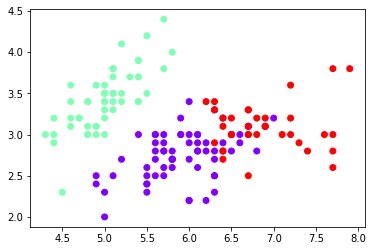

In [30]:
# plt.figure(figsize = (10,7))
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=hc.labels_,cmap="rainbow");

In [31]:
df["predicted_clusters"] = hc.labels_
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1


In [32]:
pd.crosstab(df.species, df.predicted_clusters)

predicted_clusters,0,1,2
species,,,
setosa,0,50,0
versicolor,49,0,1
virginica,15,0,35


In [33]:
map_dict = {"virginica":2,
             "setosa": 1,
             "versicolor":0}

In [34]:
df["original_classes"] = df.species.map(map_dict)
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters,original_classes
131,7.9,3.8,6.4,2.0,virginica,2,2
56,6.3,3.3,4.7,1.6,versicolor,0,0
7,5.0,3.4,1.5,0.2,setosa,1,1
94,5.6,2.7,4.2,1.3,versicolor,0,0
65,6.7,3.1,4.4,1.4,versicolor,0,0


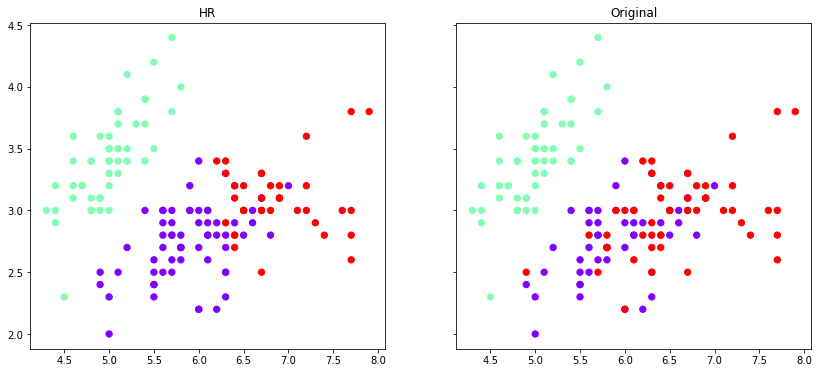

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,6)) 
ax1.set_title('HR')
ax1.scatter(df.iloc[:,0], df.iloc[:,1], c = df.predicted_clusters, s = 40, cmap = "rainbow") # s=40 ,dot size
ax2.set_title("Original")
ax2.scatter(df.iloc[:,0], df.iloc[:,1], c = df.original_classes, s = 40, cmap = "rainbow");

## EVALUATION METRICS

In [36]:
print(f'Silhouette Score(n=3): {silhouette_score(X, hc.labels_)}')

Silhouette Score(n=3): 0.5543236611296424


In [37]:
adjusted_rand_score(df['species'], df['predicted_clusters'])

0.7311985567707745